<img src="http://universidadcucii.mx/img/demos/law-firm/logo.png" width="150">

# Universidad CUCII 
## Estadística para la Educación

### Sesión 03/05 (Sábado 2018-06-16)

#### 0. Repaso: leer datos de un CSV y graficar un barplot con colores y leyenda

Bajar los archivos de la sesión 03/05 y colocar el archivo **5toBimLimpio.csv** en la ruta determinada por la orden *getwd()* de R

In [1]:
getwd()

[1] "/home/ani/Dropbox/sonora/CUCII-StatsEdu"

In [2]:
datos <- read.csv("5tobimLimpio.csv")
head(datos) #esta orden sirve para ver el inicio de los datos, la cabecita

mat,nombrecompleto,bim.ptos,bim.calif,bim.faltas,bim.demers,bim.ptos.1,bim.calif.1,bim.faltas.1,bim.demers.1,bim.ptos.2,bim.calif.2,bim.faltas.2,bim.demers.2
9737,ALVAREZ SÁNCHEZ KEVIN ALEXIS,110,9.0,1,0,113,9.3,1,0,112,9.2,2,0
9628,ARROYO RUBIO IÑAKI IAN,110,9.0,0,0,110,9.0,0,0,110,9.0,0,0
7801,GUZMÁN ESPINOZA IVAN,95,7.5,0,0,95,7.5,0,0,95,7.5,0,0
7529,HERNÁNDEZ GRANADOS YESENIA ESMERALDA,120,10.0,1,0,120,10.0,1,0,120,10.0,2,0
6137,LUNA BECERRA LILIANA,115,9.5,0,0,118,9.8,0,0,117,9.7,0,0
6079,MARTÍNEZ CASTELLANOS HAZEL,120,10.0,0,0,120,10.0,0,0,120,10.0,0,0


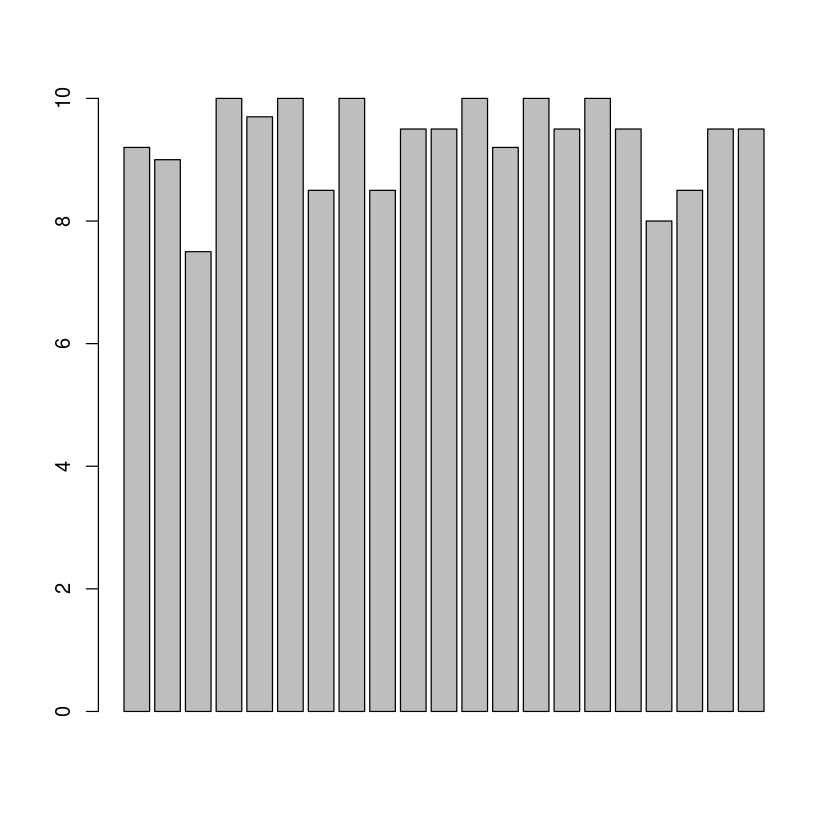

In [3]:
#gráfica de barras del bimestre
barplot(datos$bim.calif.2)

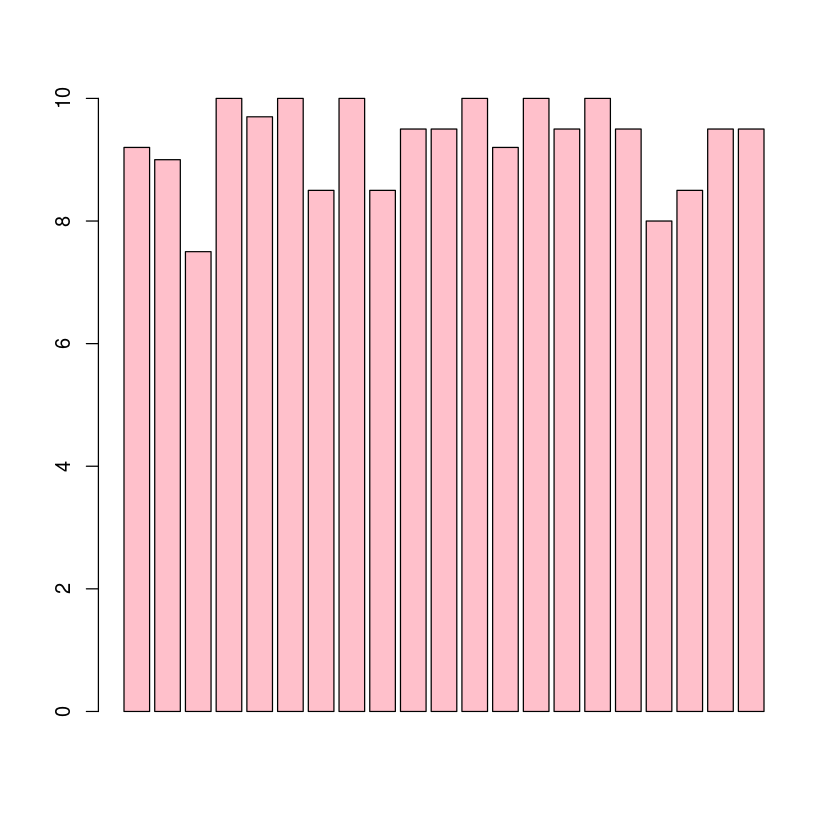

In [4]:
#pongamos colores
barplot(datos$bim.calif.2,col="pink")

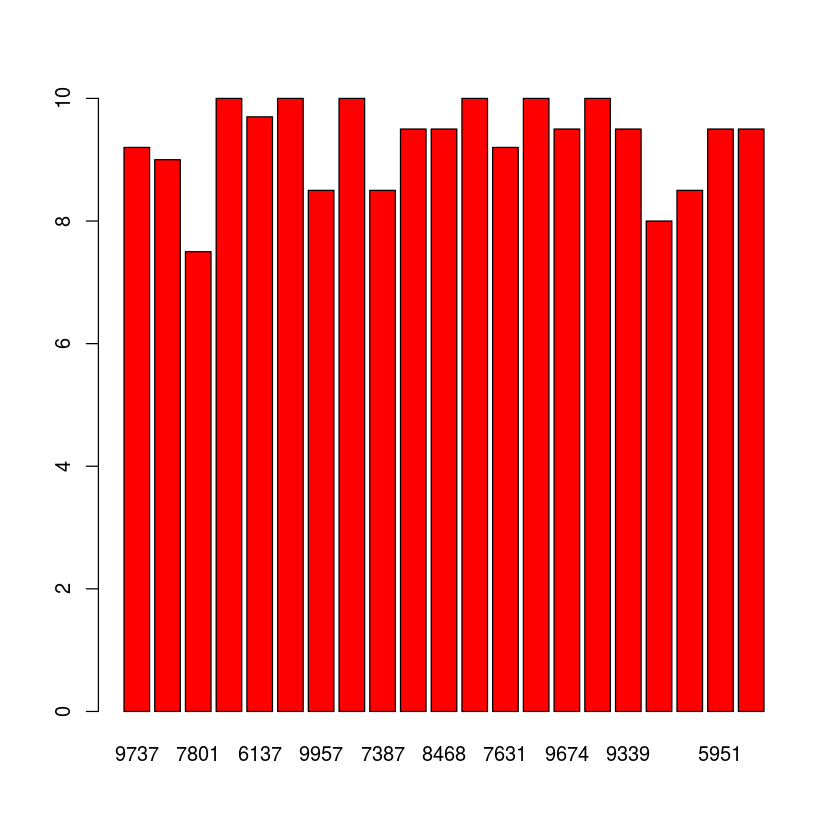

In [5]:
#ahora con etiquetas en el eje x
barplot(datos$bim.calif.2, col="red",names.arg = datos$mat)

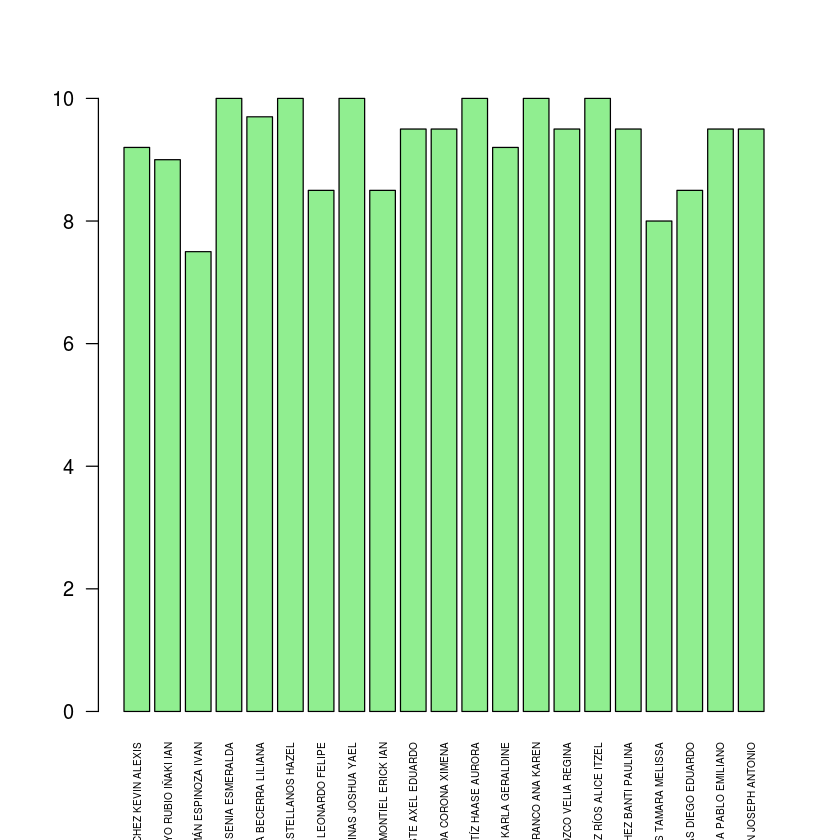

In [6]:
#ahora con nombres largos en vertical (las) y letras de menor tamaño (cex.names)
barplot(datos$bim.calif.2, col="lightgreen",names.arg = datos$nombrecompleto,
        las=2, cex.names = 0.5)

#### 1. Población y muestra

In [7]:
#poblacion de 6 millones de elementos, 
poblacion <- rnorm(n = 3e6, mean = 7.5, sd = 1.5)
head(poblacion)

[1] 5.743904 8.318957 6.370318 6.535689 9.718443 7.670678

In [8]:
#redondeamos a 2 cifras para que parezcan calificaciones "reales"
poblacion <- round(x = rnorm(n = 3e6, mean = 7.5, sd = 1.5),digits = 2)
head(poblacion)

[1] 7.10 7.09 8.72 8.71 7.64 9.71

In [9]:
#resumen de datos de la población
summary(poblacion)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -0.420   6.490   7.500   7.501   8.510  15.430 

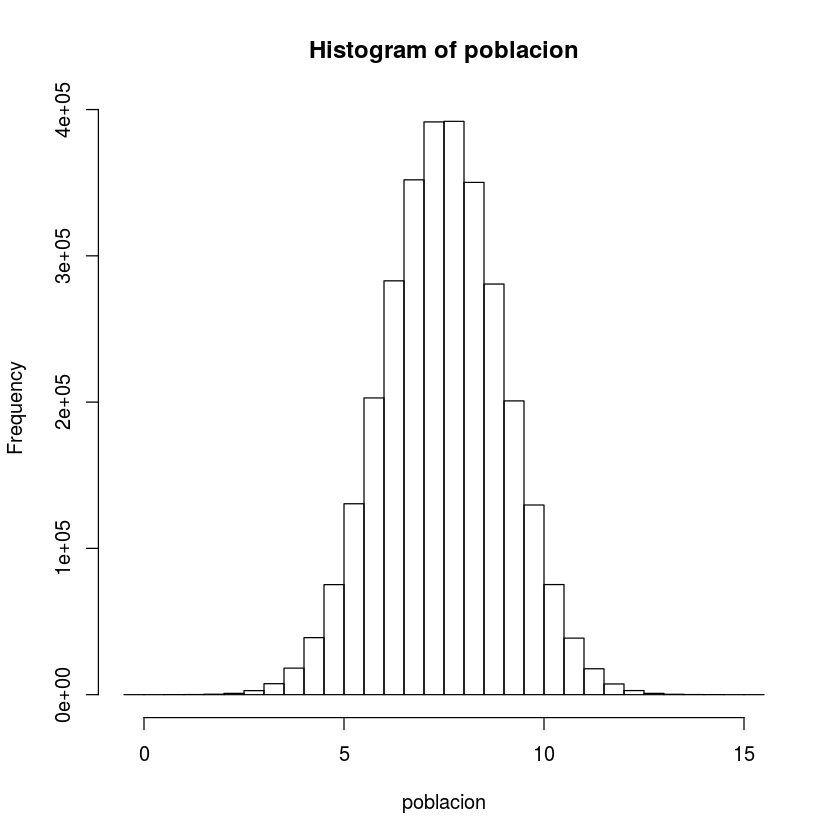

In [10]:
#histograma de la población
hist(poblacion)

In [11]:
#hagamos una muestra pequeña de apenas 400 elementos
muestra <- sample(x = poblacion, size = 400)
summary(muestra)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.840   6.500   7.425   7.450   8.390  12.600 

In [12]:
summary(poblacion)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -0.420   6.490   7.500   7.501   8.510  15.430 

¡Se parecen muchoooo! Sobre todo la mediana y la media, los cuartiles... para eso es la estadística: para inferir desde la muestra las características de la población

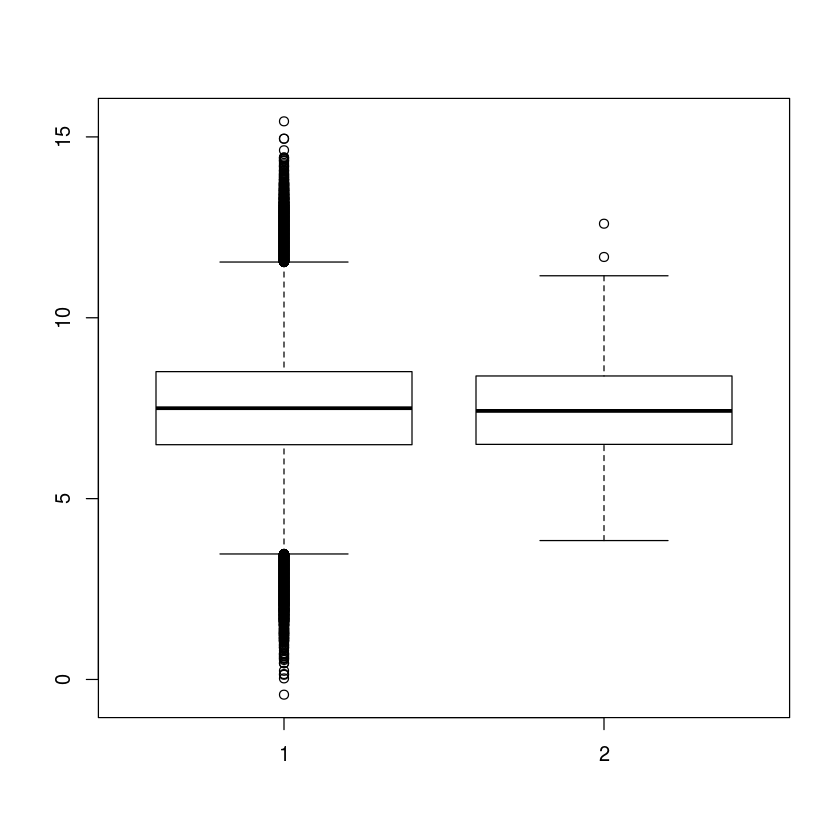

In [13]:
boxplot(poblacion,muestra)

#### 2. Instalación de paquetes *(packages)* para funcionalidad extendida
Instalemos el paquete **"docxtractr"** para extraer datos archivos MS Word 2013  y versiones superiores, es decir, documentos con extensión *.docx*, que como su estructura está basada en XML, a R le es sencillo acceder a los datos contenidos en tablas.

In [14]:
install.packages("docxtractr")

Installing package into ‘/home/ani/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [15]:
library(docxtractr)

Visitemos [Resultados del ENARM](http://www.cifrhs.salud.gob.mx/site1/enarm/reportes_academicos.html) y bajemos el archivo de resultados del Examen Nacional para Aspirantes a Residencias Médicas, correspondiente al **año 2001**. Transformemos el archivo de extensión 'doc' a 'docx'. **Y borremos los encabezados innecesarios.**

Intentemos responder las siguientes preguntas:
1. ¿Qué probabilidad de éxito tuvo ese examen en ese año?
1. ¿Qué eficiencia (Seleccionados/Sustentantes) tiene cada universidad?
1. ¿Cuál universidad tiene la máxima eficiencia?
1. ¿Cuál universidad tiene la peor eficiencia?
1. ¿Qué universidades tienen una eficiencia en el 3er cuartil?

In [16]:
#el archivo 2001 también está disponible en la página del curso
archi <- read_docx("E25_enarm_ra_2001.docx")
archi

No comments in document


Word document [E25_enarm_ra_2001.docx]

Table 1
  total cells: 716
  row count  : 104
  uniform    : unlikely => found differing cell counts (7, 1) across some rows
  has header : unlikely


In [17]:
#extraigamos los datos de la tabla contenida en el documento word
datosArchi <- docx_extract_tbl(archi)
head(datosArchi)

Instituciones Educativas,Médicos Inscritos,Médicos Sustentantes,Médicos Seleccionados,Resultados Secciones en Español,Resultados Sección en Inglés,Total
AGUASCALIENTES,,,,,,
Universidad Autónoma de Aguascalientes,119,115,35,41.50,5.84,47.34
BAJA CALIFORNIA,,,,,,
Universidad Autónoma de Baja California-Mexicali,155,147,73,45.38,6.30,51.68
Universidad Autónoma de Baja California-Tijuana,106,98,33,43.07,6.71,49.78
Centro de Estudios Universitarios Xochicalco-Ensenada,27,24,7,38.96,5.77,44.72


In [18]:
#quitemos de los datos los puros estados, al descartar todos los renglones
#cuyos Médicos Inscritos sean vacíos
#en R tenemos la notación estructura[renglones,columna] para seleccionar:
universidades <- datosArchi[datosArchi$`Médicos Inscritos` != "" ,]
head(universidades)

,Instituciones Educativas,Médicos Inscritos,Médicos Sustentantes,Médicos Seleccionados,Resultados Secciones en Español,Resultados Sección en Inglés,Total
2,Universidad Autónoma de Aguascalientes,119,115,35,41.50,5.84,47.34
4,Universidad Autónoma de Baja California-Mexicali,155,147,73,45.38,6.30,51.68
5,Universidad Autónoma de Baja California-Tijuana,106,98,33,43.07,6.71,49.78
6,Centro de Estudios Universitarios Xochicalco-Ensenada,27,24,7,38.96,5.77,44.72
8,Universidad Autónoma de Campeche,54,51,9,40.34,5.51,45.86
10,Universidad Autónoma de Chiapas,251,243,30,38.11,4.81,42.92


In [19]:
#calculemos entonces la eficiencia definida como los seleccionados entre los sustentantes
eficiencia <- universidades$`Médicos Seleccionados` / universidades$`Médicos Sustentantes`

ERROR: Error in universidades$`Médicos Seleccionados`/universidades$`Médicos Sustentantes`: non-numeric argument to binary operator


In [20]:
#resulta que nos marca el error por querer dividir dos valores non-numeric,
#o sea tipo character
str(universidades)

'data.frame':	70 obs. of  7 variables:
 $ Instituciones Educativas       : chr  "Universidad Autónoma de  Aguascalientes" "Universidad Autónoma de Baja California-Mexicali" "Universidad Autónoma de Baja California-Tijuana" "Centro de Estudios Universitarios Xochicalco-Ensenada" ...
 $ Médicos Inscritos              : chr  "119" "155" "106" "27" ...
 $ Médicos Sustentantes           : chr  "115" "147" "98" "24" ...
 $ Médicos Seleccionados          : chr  "35" "73" "33" "7" ...
 $ Resultados Secciones en Español: chr  "41.50" "45.38" "43.07" "38.96" ...
 $ Resultados Sección en Inglés   : chr  "5.84" "6.30" "6.71" "5.77" ...
 $ Total                          : chr  "47.34" "51.68" "49.78" "44.72" ...


In [21]:
#corrijamos a tipo numérico ambas variables
universidades$`Médicos Seleccionados` <- as.numeric( universidades$`Médicos Seleccionados` )
universidades$`Médicos Sustentantes` <- as.numeric( universidades$`Médicos Sustentantes` )
str(universidades)

'data.frame':	70 obs. of  7 variables:
 $ Instituciones Educativas       : chr  "Universidad Autónoma de  Aguascalientes" "Universidad Autónoma de Baja California-Mexicali" "Universidad Autónoma de Baja California-Tijuana" "Centro de Estudios Universitarios Xochicalco-Ensenada" ...
 $ Médicos Inscritos              : chr  "119" "155" "106" "27" ...
 $ Médicos Sustentantes           : num  115 147 98 24 51 243 40 94 123 139 ...
 $ Médicos Seleccionados          : num  35 73 33 7 9 30 3 46 26 50 ...
 $ Resultados Secciones en Español: chr  "41.50" "45.38" "43.07" "38.96" ...
 $ Resultados Sección en Inglés   : chr  "5.84" "6.30" "6.71" "5.77" ...
 $ Total                          : chr  "47.34" "51.68" "49.78" "44.72" ...


In [22]:
#calculemos entonces la eficiencia definida como los seleccionados entre los sustentantes
eficiencia <- universidades$`Médicos Seleccionados` / universidades$`Médicos Sustentantes`
head(eficiencia)

[1] 0.3043478 0.4965986 0.3367347 0.2916667 0.1764706 0.1234568

In [23]:
#armemos los resultados con el nombre de las universidades y su eficiencia
resultados1 <- data.frame(universidades$`Instituciones Educativas`,eficiencia)
tail(resultados1) #sólo la colita

,universidades..Instituciones.Educativas.,eficiencia
65,Médicos que estudiaron en Esc.de Med. en el Extranjero,0.6666667
66,TOTAL,0.1868053
67,TOTAL DE MÉDICOS EXTRANJEROS,0.4150198
68,TOTAL,0.1899542
69,NA,NA
70,NA,NA


In [26]:
#quitemos los NA que por el momento no nos sirven
resultados1 <- resultados1[complete.cases(resultados1), ]
tail(resultados1)

,universidades..Instituciones.Educativas.,eficiencia
63,Universidad Autónoma de Zacatecas,0.1985560
64,TOTAL DE MÉDICOS MEXICANOS,0.1866460
65,Médicos que estudiaron en Esc.de Med. en el Extranjero,0.6666667
66,TOTAL,0.1868053
67,TOTAL DE MÉDICOS EXTRANJEROS,0.4150198
68,TOTAL,0.1899542


In [27]:
#a la pregunta de cómo presentar ordenado un data.frame

resultados1[order(resultados1$eficiencia,decreasing = TRUE),]

,universidades..Instituciones.Educativas.,eficiencia
16,Universidad del Ejército y Fuerza Aérea,0.8333333
38,Inst. Tecnológico de Estudios Superiores de Monterrey,0.7407407
47,Universidad Autónoma de San Luis Potosí,0.7401575
65,Médicos que estudiaron en Esc.de Med. en el Extranjero,0.6666667
17,Universidad La Salle,0.6313131
25,Universidad de Guanajuato,0.5842697
39,Universidad Autónoma de Nuevo León,0.5111732
2,Universidad Autónoma de Baja California-Mexicali,0.4965986
8,Universidad Autónoma de Chihuahua,0.4893617
46,Universidad Autónoma de Querétaro,0.4588235


** AHORA TE TOCA A TÍ: LA TAREA ES QUE REPITAS ESTE MISMO PROCESO PERO PARA EL ARCHIVO CORRESPONDIENTE AL AÑO 2017 **